In [11]:
import pandas as pd

In [12]:
dataframe = pd.read_csv('SMSSpamCollection.txt', delimiter = "\t")
dataframe.columns = ["label", "message"]

### Data description
- Dataset with 5571 entries. 
- Total of 4,824 SMS messages.
- 4825 legitimate and 747 spam messages.
- label: can be ham for legitimate or spam.
- message: the message text.

In [13]:
dataframe

,label,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


### There is no null fields.

In [14]:
dataframe.isnull().sum()

label      0
message    0
dtype: int64

In [15]:
dataframe.describe()

,label,message
count,5571,5571
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4824,30


In [16]:
dataframe.head()

,label,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [17]:
dataframe.tail()

,label,message
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...
5570,ham,Rofl. Its true to its name


### Data distribution.

<Figure size 576x432 with 0 Axes>

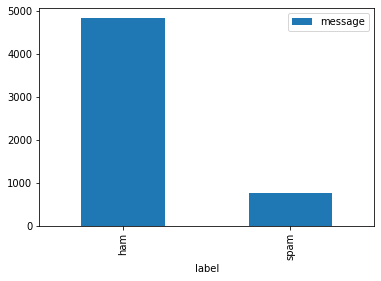

In [18]:
import matplotlib.pyplot as plt

graphic = plt.figure(figsize=(8,6))
dataframe.groupby('label').count().plot.bar(ylim=0)
plt.show()

### Split the dataset into training and test.

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataframe, test_size=0.3, random_state=42)

In [20]:
X_train = train.message
X_test = test.message

### The possible categories.

In [21]:
categories = ["ham", "spam"]
categories

['ham', 'spam']

### Running ML algorithms.
#### MultinomialNB
- Based on the Bayes theorem.
- Is a set supervised learning algorithms based on applying Bayes. 
#### TfidfVectorizer
- First we need to transform the raw text into computable data to feed the algorithm.
- Using TF, each word is waighted and that weight is related to the frequency of that word in the text.
- Using IDF, this method normalize the weight of frequent terms like "is", "it", "in" etc.
- The TfidfVectorizer used in the Pipeline make that transformation.
#### OneVsRestClassifier
- OneVsRestClassifier is a classification algorithm that uses binary heuristic for multi-class classification.
#### Pipeline
- Pipeline is a way to automate the processes.
#### stopwords
- stopwords is our set of commom words to be normalized.

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score

stop_words = set(stopwords.words('english'))

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None)))])

NB_pipeline.fit(X_train, train['label'])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...})),
                ('clf', OneVsRestClassifier(estimator=MultinomialNB()))])

### Analysing performance.

In [23]:
prediction = NB_pipeline.predict(X_test)
'Test accuracy is {}'.format(accuracy_score(test['label'], prediction))

'Test accuracy is 0.9766746411483254'

In [24]:
not_spam = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

In [25]:
is_spam = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [26]:
arbitrary_message = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005."

In [27]:
predict_not_spam = NB_pipeline.predict([not_spam])
predict_not_spam

array(['ham'], dtype='<U4')

In [28]:
predict_is_spam = NB_pipeline.predict([is_spam])
predict_is_spam

array(['spam'], dtype='<U4')

In [29]:
predict_arbitrary_message = NB_pipeline.predict([arbitrary_message])
predict_arbitrary_message

array(['spam'], dtype='<U4')